# Data Mining Course Spark Exercise
## Sharif University of Technology

In this notebook we are going to analyze farsi wikipedia. 
Outline of the exercise:
* Dataset preparation
* Preprocessing (25 Points) 
* Exploration (20 Points) 
* TF-IDF + Search (55 Points)

You should replace the `TODO` parts with your implementation. Remeber that each `TODO` may take multiple lines and you shouldn't limit your self to one-line codes.

## Prerequisites
You should be faimilar with [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). In this notebook you should use the following formula for tf-idf:
$$f_{t,d}/len(d) \times log(1 + \frac{N}{n_t})$$

## Warning: RDD api only
You **can not** use Dataframe, Dataset, mllib, ml, ... apis of spark in this exercise. You should only use the [RDD api](http://spark.apache.org/docs/2.1.0/api/python/pyspark.html#pyspark.RDD).

# Section 0: Please enter your name below
# Name: Vahid Pourakbar
# Student Number: 400205511

# Section 1: Dataset preparation

This section of notebook contains only shell commands. You don't need to completely understand each command or change anything.

Please run all the paragraphs sequentially.

In [7]:
import getpass
import os

password = getpass.getpass()
command = "sudo -S apt-get -y install wget git" #can be any command but don't forget -S as it enables input from stdin
os.system('echo %s | %s' % (password, command))

[sudo] password for vahid: 

Reading package lists...
Building dependency tree...
Reading state information...
wget is already the newest version (1.20.3-1ubuntu2).
wget set to manually installed.
The following packages were automatically installed and are no longer required:
  efibootmgr libassuan0:i386 libavahi-common-data:i386 libffi7:i386
  libfwupdplugin1 liblensfun-data-v1 liblensfun1 liblept5 libnettle7:i386
  libnpth0:i386 libp11-kit0:i386 libreadline8:i386 libtasn1-6:i386
  libtesseract4 pinentry-curses:i386
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  git-man liberror-perl
Suggested packages:
  git-daemon-run | git-daemon-sysvinit git-doc git-el git-email git-gui gitk
  gitweb git-cvs git-mediawiki git-svn
The following NEW packages will be installed:
  git git-man liberror-perl
0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.
Need to get 5,443 kB of archives.
After this operation, 38.5 MB of additional disk space will be used.
Get:1 http:

dpkg-preconfigure: unable to re-open stdin: No such file or directory


Fetched 5,443 kB in 1s (4,511 kB/s)
Selecting previously unselected package liberror-perl.
(Reading database ... 228825 files and directories currently installed.)
Preparing to unpack .../liberror-perl_0.17029-1_all.deb ...
Unpacking liberror-perl (0.17029-1) ...
Selecting previously unselected package git-man.
Preparing to unpack .../git-man_1%3a2.25.1-1ubuntu3.6_all.deb ...
Unpacking git-man (1:2.25.1-1ubuntu3.6) ...
Selecting previously unselected package git.
Preparing to unpack .../git_1%3a2.25.1-1ubuntu3.6_amd64.deb ...
Unpacking git (1:2.25.1-1ubuntu3.6) ...
Setting up liberror-perl (0.17029-1) ...
Setting up git-man (1:2.25.1-1ubuntu3.6) ...
Setting up git (1:2.25.1-1ubuntu3.6) ...
Processing triggers for man-db (2.9.1-1) ...


0

In [2]:
# ! sudo apt-get -y install wget git

128.46s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[sudo] password for vahid: 


## Download the dump

In [8]:
! wget --no-check-certificate -P . https://dumps.wikimedia.org/fawiki/latest/fawiki-latest-pages-articles-multistream.xml.bz2

818.77s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


--2022-11-27 18:05:20--  https://dumps.wikimedia.org/fawiki/latest/fawiki-latest-pages-articles-multistream.xml.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.142, 2620:0:861:2:208:80:154:142
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1119345079 (1.0G) [application/octet-stream]
Saving to: ‘./fawiki-latest-pages-articles-multistream.xml.bz2.1’

fawiki-latest-pages 100%[===================>]   1.04G  39.3KB/s    in 2h 56m  

2022-11-27 21:01:43 (103 KB/s) - ‘./fawiki-latest-pages-articles-multistream.xml.bz2.1’ saved [1119345079/1119345079]



## Extract the dump (this may take a few minutes)

In [9]:
! bzip2 -d fawiki-latest-pages-articles-multistream.xml.bz2

11664.71s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


## Clone git project for converting wikipedia xml dump to json

In [10]:
! pip install wikiextractor

12283.69s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     |████████████████████████████████| 46 kB 39 kB/s eta 0:00:0101


## Run the script to convert xml to json (this might take around 30 minutes)

In [11]:
! python -m wikiextractor.WikiExtractor --json fawiki-latest-pages-articles-multistream.xml

12302.29s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


INFO: Preprocessing 'fawiki-latest-pages-articles-multistream.xml' to collect template definitions: this may take some time.
INFO: Preprocessed 100000 pages
INFO: Preprocessed 200000 pages
INFO: Preprocessed 300000 pages
INFO: Preprocessed 400000 pages
INFO: Preprocessed 500000 pages
INFO: Preprocessed 600000 pages
INFO: Preprocessed 700000 pages
INFO: Preprocessed 800000 pages
INFO: Preprocessed 900000 pages
INFO: Preprocessed 1000000 pages
INFO: Preprocessed 1100000 pages
INFO: Preprocessed 1200000 pages
INFO: Preprocessed 1300000 pages
INFO: Preprocessed 1400000 pages
INFO: Preprocessed 1500000 pages
INFO: Preprocessed 1600000 pages
INFO: Preprocessed 1700000 pages
INFO: Preprocessed 1800000 pages
INFO: Preprocessed 1900000 pages
INFO: Preprocessed 2000000 pages
INFO: Preprocessed 2100000 pages
INFO: Preprocessed 2200000 pages
INFO: Preprocessed 2300000 pages
INFO: Preprocessed 2400000 pages
INFO: Preprocessed 2500000 pages
INFO: Preprocessed 2600000 pages
INFO: Preprocessed 2700000

## Ensure output files exist

In [12]:
! ls text/*/*

12954.24s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


text/AA/wiki_00  text/AI/wiki_64  text/AR/wiki_28  text/AZ/wiki_92
text/AA/wiki_01  text/AI/wiki_65  text/AR/wiki_29  text/AZ/wiki_93
text/AA/wiki_02  text/AI/wiki_66  text/AR/wiki_30  text/AZ/wiki_94
text/AA/wiki_03  text/AI/wiki_67  text/AR/wiki_31  text/AZ/wiki_95
text/AA/wiki_04  text/AI/wiki_68  text/AR/wiki_32  text/AZ/wiki_96
text/AA/wiki_05  text/AI/wiki_69  text/AR/wiki_33  text/AZ/wiki_97
text/AA/wiki_06  text/AI/wiki_70  text/AR/wiki_34  text/AZ/wiki_98
text/AA/wiki_07  text/AI/wiki_71  text/AR/wiki_35  text/AZ/wiki_99
text/AA/wiki_08  text/AI/wiki_72  text/AR/wiki_36  text/BA/wiki_00
text/AA/wiki_09  text/AI/wiki_73  text/AR/wiki_37  text/BA/wiki_01
text/AA/wiki_10  text/AI/wiki_74  text/AR/wiki_38  text/BA/wiki_02
text/AA/wiki_11  text/AI/wiki_75  text/AR/wiki_39  text/BA/wiki_03
text/AA/wiki_12  text/AI/wiki_76  text/AR/wiki_40  text/BA/wiki_04
text/AA/wiki_13  text/AI/wiki_77  text/AR/wiki_41  text/BA/wiki_05
text/AA/wiki_14  text/AI/wiki_78  text/AR/wiki_42  text/BA/wik

## Install Pypark & Initialization
Uncomment this section if you use google colab or local pc

In [13]:
! pip install pyspark

13000.00s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [1]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("MDA_2021") \
    .master("local[*]") \
    .getOrCreate()

sc=spark.sparkContext

22/12/04 18:03:02 WARN Utils: Your hostname, vahid-PC resolves to a loopback address: 127.0.1.1; using 172.27.210.173 instead (on interface wlp2s0)
22/12/04 18:03:02 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/04 18:03:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Reading the data

In [2]:
articles_rdd = sc.textFile("text/*/*") # Now you have a RDD with wikipedia posts
articles_rdd.take(1)

['{"id": "2", "revid": "23528", "url": "https://fa.wikipedia.org/wiki?curid=2", "title": "\\u0635\\u0641\\u062d\\u0647\\u0654 \\u0627\\u0635\\u0644\\u06cc", "text": "&lt;templatestyles src=\\"\\u0635\\u0641\\u062d\\u0647 \\u0627\\u0635\\u0644\\u06cc/styles.css\\"/&gt;\\n \\n \\n \\n \\n \\n \\n \\n \\n \\n \\n \\n \\n\\u0627\\u0645\\u0631\\u0648\\u0632: \\u060c \\u0645\\u06cc\\u0644\\u0627\\u062f\\u06cc \\u0628\\u0631\\u0627\\u0628\\u0631 \\u0647\\u062c\\u0631\\u06cc \\u062e\\u0648\\u0631\\u0634\\u06cc\\u062f\\u06cc \\u0648 (UTC)\\n \\n \\n \\n \\n \' \\u2013 \'\\n \\n \\n \\n \\n \\n \\n __NOEDITSECTION__"}']

# Section 2: Preprocessing (25 Points)

In this section we will remove useless part (for example /n and /u200c and ...) also find and remove stop words and remove the words with a low count in the corpus

In [ ]:
import json

articles_rdd = #TODO: parse the json string
cleansed_articles_rdd= #TODO: cleansed text
words_rdd = #TODO: extract words from title and description
words_count_rdd = #TODO: make an rdd with the count of each word
top_100 = #TODO: find the 100 most common words
stopwords = ['و', 'با'] #TODO: complete the list of stopwords based on top 100 common words
articles_without_stopwords_rdd = #TODO: remove stopwords from the article title and text
MIN_COUNT = 20
uncommon_words = #TODO: list of the words that have occured less than MIN_COUNT in the whole corpus
articles_cleaned_rdd = #TODO: remove uncommon words from articles_without_stopwords_rdd
articles_cleaned_rdd.take(1) # This should output a dictionary with url,title and text keys. title and text should not have stopwords or uncommon.

In [3]:
import json
articles_rdd = articles_rdd.map(json.loads) # parse the json string
articles_rdd.take(1)

[{'id': '2',
  'revid': '23528',
  'url': 'https://fa.wikipedia.org/wiki?curid=2',
  'title': 'صفحهٔ اصلی',
  'text': '&lt;templatestyles src="صفحه اصلی/styles.css"/&gt;\n \n \n \n \n \n \n \n \n \n \n \n \nامروز: ، میلادی برابر هجری خورشیدی و (UTC)\n \n \n \n \n \' – \'\n \n \n \n \n \n \n __NOEDITSECTION__'}]

In [4]:
# sample_rdd = articles_rdd.sample(withReplacement=False, fraction=0.2, seed=10)
# sample_rdd.take(2)

[{'id': '643',
  'revid': '962109',
  'url': 'https://fa.wikipedia.org/wiki?curid=643',
  'title': 'ویکی',
  'text': 'ویکی معمولاً به انواعی از تارنما\u200cها گفته می\u200cشود که به تمام بازدیدکننده\u200cهایش (حتی گاه، بدون نیاز به نام\u200cنویسی در تارنما)، اجازهٔ ویرایش، افزودن یا حذف نوشته\u200cها را می\u200cدهد. معمولاً در ویکی\u200cها متن\u200cها با استفاده از یک زبان نشانه\u200cگذاری ساده نوشته می\u200cشوند و با کمک یک ویرایشگر متن غنی قابل ویرایش است.\nبه نرم\u200cافزارهای ویکی که پایهٔ چنین تارنماهایی را ممکن می\u200cسازند، «موتور ویکی» گفته می\u200cشود. موتور ویکی، یک سامانه مدیریت محتوا است که ساختار نامستقیم کمی دارد و کاربران می\u200cتوانند بسته به نیازشان با تمام قسمت\u200cها مستقیماً کار کنند. تفاوت این سامانهٔ مدیریت محتوا با سایر سامانه\u200cها، ازجمله وبلاگ\u200cها، این است که در ویکی ایجاد محتوا بدون مالک یا رهبرِ تعریف\u200cشده انجام می\u200cگیرد و ساختار غیرمستقیم کمتری وجود دارد؛ بنابراین، ساختار در ارتباط با نیازهای کاربران است.\nتاکنون بزرگ\u200cترین ویکی، ویکی\u

In [4]:
import re

def remove_useless_part(article):
    article['title'] = re.sub("\u200c|\n", '', article['title'])
    article['text'] = re.sub("\u200c|\n", '', article['text'])
    return article

# cleansed_articles_rdd = sample_rdd.map(remove_useless_part)
cleansed_articles_rdd = articles_rdd.map(remove_useless_part)
cleansed_articles_rdd.take(2)


[{'id': '2',
  'revid': '23528',
  'url': 'https://fa.wikipedia.org/wiki?curid=2',
  'title': 'صفحهٔ اصلی',
  'text': '&lt;templatestyles src="صفحه اصلی/styles.css"/&gt;            امروز: ، میلادی برابر هجری خورشیدی و (UTC)     \' – \'       __NOEDITSECTION__'},
 {'id': '594',
  'revid': '349698',
  'url': 'https://fa.wikipedia.org/wiki?curid=594',
  'title': 'ویکیپدیا',
  'text': 'ویکیپدیا (کوتهنوشت بهصورت «وپ» و «WP») یک دانشنامه برخط چندزبانه مبتنی بر وب با محتوای آزاد و همکاری باز است که با همکاری افراد داوطلب نوشته میشود و هر کسی که به اینترنت و وب دسترسی داشته باشد میتواند مقالات آن را ببیند و ویرایش کند. نام ویکیپدیا واژهای ترکیبی است که از واژههای ویکی (وبگاه مشارکتی) و اِنسایکلوپدیا (Encyclopedia) (دانشنامه یا دائرةالمعارف) گرفته شدهاست. هدف ویکیپدیا آفرینش و انتشار جهانی یک دانشنامه با محتوای آزاد به تمامی زبانهای زندهٔ دنیا است.ویکیپدیای انگلیسی در تاریخ ۱۵ ژانویه ۲۰۰۱ (۲۶ دی ۱۳۷۹) به صورت مکملی برای دانشنامهٔ تخصصی نیوپدیا نوشته شد. بنیانگذاران آن «جیمی ویلز» و «لری سنگر» ه

In [5]:
def extracting_words(article):
    words_list = re.findall(r"[\u0600-\u06FF]+", article['title'])
    words_list.extend(re.findall(r"[\u0600-\u06FF]+", article['text']))
    return words_list

words_rdd = cleansed_articles_rdd.flatMap(extracting_words)
words_rdd.take(4)

['صفحهٔ', 'اصلی', 'صفحه', 'اصلی']

In [6]:
words_count_rdd = words_rdd.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y)
words_count_rdd.take(4)

[('پایدار', 5745), ('دهی', 3845), ('بدیعالزمان', 273), ('جمال', 2641)]

In [7]:
top_100 = words_count_rdd.sortBy(lambda x : x[1], ascending = False).take(100)
print(top_100)

[('در', 5116152), ('و', 4594310), ('به', 3210577), ('از', 2984884), ('که', 2198568), ('است', 1681996), ('این', 1549773), ('را', 1425403), ('با', 1168502), ('یک', 980079), ('سال', 774946), ('آن', 708627), ('برای', 622487), ('شد', 587026), ('بود', 547357), ('او', 506533), ('کرد', 457724), ('شدهاست', 436021), ('دارد', 408657), ('بر', 367294), ('تا', 361450), ('خود', 354377), ('یا', 346920), ('میشود', 329330), ('ایران', 328814), ('شده', 323214), ('،', 320880), ('واقع', 316725), ('وی', 284891), ('فوتبال', 284655), ('قرار', 273003), ('جمعیت', 272027), ('نام', 258697), ('نیز', 256903), ('عنوان', 248156), ('دو', 237699), ('نفر', 235633), ('پس', 227028), ('شهرستان', 206649), ('یکی', 206332), ('توسط', 205506), ('استفاده', 203349), ('شهر', 202664), ('آنها', 201073), ('اهل', 200965), ('میکند', 184457), ('بازی', 184267), ('همچنین', 183235), ('فیلم', 175021), ('بخش', 173106), ('باشگاه', 166041), ('استان', 163778), ('اما', 162070), ('دیگر', 158087), ('آمریکا', 157626), ('؛', 157555), ('میتوان', 15182

In [8]:
stopwords = ['در', 'و', 'به', 'از', 'که', 'است', 'این', 'را', 'با', 'یک', 'سال', 'آن', 'برای', 'شد', 'بود', 'او', 'کرد', 'شدهاست', 'دارد', 'بر', 'تا', 'خود', 'یا', 'میشود', 'شده', '،', 'واقع', 'وی', 'قرار', 'نام', 'نیز', 'عنوان', 'دو', 'نفر', 'پس', 'یکی', 'توسط', 'آنها', 'استفاده', 'میکند', 'همچنین', 'بخش', 'اما', 'دیگر', '؛', 'هم', 'میتوان', 'هر', 'اشاره', 'مورد', 'وجود', 'زادهٔ', 'صورت', 'بودهاست', 'هستند', 'روی', 'زیر', 'بین', 'میباشد', 'باشد', 'داشت', 'کردهاست', 'داد', 'کند', 'می', 'انجام', 'پیش', 'شود', 'ای', 'دارای', 'مانند', 'بعد']

In [9]:
def removing_stopwords(article):
    for word in stopwords:
        article['title']= re.sub(r"(\s+|\()"+word+ "(\s+|\))", r'\1\2', article['title'])
        article['text']= re.sub(r"(\s+|\()"+word+ "(\s+|\))", r'\1\2', article['text'])   
    return article

articles_without_stopwords_rdd = cleansed_articles_rdd.map(removing_stopwords)
articles_without_stopwords_rdd.take(2)

[{'id': '2',
  'revid': '23528',
  'url': 'https://fa.wikipedia.org/wiki?curid=2',
  'title': 'صفحهٔ اصلی',
  'text': '&lt;templatestyles src="صفحه اصلی/styles.css"/&gt;            امروز:  میلادی برابر هجری خورشیدی  (UTC)     \' – \'       __NOEDITSECTION__'},
 {'id': '594',
  'revid': '349698',
  'url': 'https://fa.wikipedia.org/wiki?curid=594',
  'title': 'ویکیپدیا',
  'text': 'ویکیپدیا (کوتهنوشت بهصورت «وپ»  «WP»)  دانشنامه برخط چندزبانه مبتنی  وب  محتوای آزاد  همکاری باز    همکاری افراد داوطلب نوشته    کسی   اینترنت  وب دسترسی داشته  میتواند مقالات   ببیند  ویرایش کند.  ویکیپدیا واژهای ترکیبی    واژههای ویکی (وبگاه مشارکتی)  اِنسایکلوپدیا (Encyclopedia) (دانشنامه  دائرةالمعارف) گرفته شدهاست. هدف ویکیپدیا آفرینش  انتشار جهانی  دانشنامه  محتوای آزاد  تمامی زبانهای زندهٔ دنیا است.ویکیپدیای انگلیسی  تاریخ ۱۵ ژانویه ۲۰۰۱ (۲۶ دی ۱۳۷۹)   مکملی  دانشنامهٔ تخصصی نیوپدیا نوشته شد. بنیانگذاران  «جیمی ویلز»  «لری سنگر» هستند. هماکنون بنیاد غیرانتفاعی ویکیمدیا پروژهٔ ویکیپدیا  پشتیبانی میکند. م

In [10]:
MIN_COUNT = 20
uncommon_words = words_count_rdd.filter(lambda x : x[1] < MIN_COUNT)
print(uncommon_words.collect()[0:10])
uncommon_words = uncommon_words.map(lambda x : x[0]).collect()
print(str(len(uncommon_words)))

[('سفالگری؛', 1), ('قادیسه', 1), ('افرازهروح', 1), ('ململ', 11), ('کاننها،', 1), ('تیرگان،', 13), ('لایموتش', 1), ('پررنگترین', 14), ('اباباسل', 2), ('المشخاب', 4)]


1659595


In [16]:
def remove_uncommon(article):
    for word in uncommon_words:
        article['title']= re.sub(word,'', article['title'])
        article['text']= re.sub(word,'', article['text'])
    return article

articles_cleaned_rdd = articles_without_stopwords_rdd.map(remove_uncommon)
articles_cleaned_rdd.take(2)

[{'id': '2',
  'revid': '23528',
  'url': 'https://fa.wikipedia.org/wiki?curid=2',
  'title': 'صفٔ لی',
  'text': '&lt;templatestyles src="صف لی/styles.css"/&gt;            ا:  م ر ری   (UTC)     \' – \'       __NOEDITSECTION__'},
 {'id': '594',
  'revid': '349698',
  'url': 'https://fa.wikipedia.org/wiki?curid=594',
  'title': 'یا',
  'text': 'یا (کووشت ب «وپ»  «WP»)  دنامه ب  تنی  وب   آزاد  ه باز    ه اد  نوشته    کسی   ارنت  وب سی د  میت لات   بب  ویش کند.  یا وهای ترکی    وی ویکی (ه تی)  ا (Encyclopedia) (دنامه  درالف) گر ش. هدف یا نش  ان جهانی  دنامه   آزاد  تمامی نهای ز دنیا است.یای اسی  ت ۱۵ ژ ۲۰۰۱ (۲۶ دی ۱۳۷۹)   م  دنامهٔ  نیا نوشته شد. نن  «جیمی ویلز»  «لری سنگر» هد. همون د غتفی ویکیمدیا پرو یا  ی م. م ارنتی لی  ه  شهر ای فا هد.  م افی د   شه آمم  س   ه یاری ."یا"  پایان آ ۲۰۰۷  ا ۲،   ۱۰ ه ب جهان  لظ شمار باکن   بیش  نیمی  ا  یای اسی مط مد.در میان تمام نهای یا  دسر ۲ (ر ۱۳۹۴) بیش  ۱۴۱ م صف    بیش  سی  هفت م د   م است.  نهای مر  ترت ن اسی بیش  ۵ م، دی ۱ م، آلمانی ۸ م، هلندی ۸

# Section 3: Exploration (20 Points)
Please answer the following questions regarding the dataset:
* How many unique 3-Letter words remain after the cleaning procedure?
* What are the top 20 most common English trigrams in the corpus?
* Plot a distribution from document lengths using appropriate bin sizes with 100 bins
* What are the titles and urls of the 5 longest articles? 
* How many and what percentage of articles contain these words? [History, Politics, Medicine, Law, Economics, Engineering]

In [17]:
unique_3letter_words = words_count_rdd.filter(lambda x : (x[0] not in (stopwords + uncommon_words)) & (len(x[0]) == 3))
print(unique_3letter_words.take(10))
# print(len(unique_3letter_words.collect())) # takes too long

[('دهی', 3845), ('۲۷،', 102), ('گئو', 35), ('۱۳۹', 607), ('رهش', 80), ('سیز', 89), ('اجم', 44), ('جيپ', 34), ('نیپ', 20), ('سنو', 96)]


In [19]:
def extracting_english_trigram_words(article):
    # words_list = re.findall(r"[a-zA-Z]+", article['title'])
    words_list = re.findall(r"[a-zA-Z']+", article['text'])
    trigram_list = []
    for i in range(len(words_list)-2):
        trigram_list.append(tuple([words_list[i], words_list[i+1], words_list[i+2]]))
    return trigram_list

# top_20_english_trigram = sample_rdd.flatMap(extracting_english_trigram_words) \
top_20_english_trigram = articles_rdd.flatMap(extracting_english_trigram_words) \
    .map(lambda x: (x, 1)) \
        .reduceByKey(lambda x, y: x + y) \
            .sortBy(lambda x : x[1], ascending = False).take(20)
top_20_english_trigram

[(('formula', 'formula', 'formula'), 31782),
 (('en', 'wikipedia', 'org'), 4796),
 (('http', 'en', 'wikipedia'), 3726),
 (('The', 'Free', 'Encyclopedia'), 3645),
 (('Wikipedia', 'The', 'Free'), 3645),
 (('w', 'index', 'php'), 3471),
 (('org', 'w', 'index'), 3470),
 (('wikipedia', 'org', 'w'), 3470),
 (('under', 'football', 'team'), 3462),
 (('national', 'under', 'football'), 3462),
 (('index', 'php', 'title'), 3456),
 (('amp', 'oldid', 'accessed'), 2885),
 (('Free', 'Encyclopedia', 'http'), 2814),
 (('Encyclopedia', 'http', 'en'), 2809),
 (("'", "'", "'"), 1987),
 (("women's", 'national', 'under'), 1893),
 (('wikipedia', 'org', 'wiki'), 1574),
 (('C', 'H', 'O'), 1322),
 (('ns', 'gt', 'lt'), 1255),
 (('gt', 'lt', 'contributor'), 1254)]

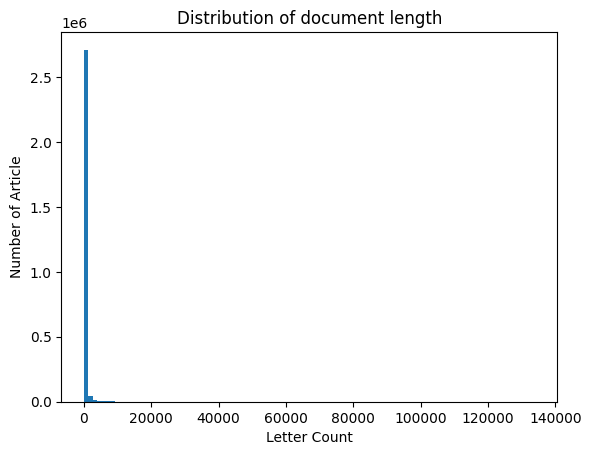

In [20]:
import matplotlib.pyplot as plt

doc_len_rdd =  articles_rdd.map(lambda article : len(article['title']) + len(article['text']))
doc_len_list = doc_len_rdd.collect()
plt.hist(doc_len_list, bins = 100)
plt.xlabel('Letter Count'), plt.ylabel('Number of Article')
plt.title('Distribution of document length')
plt.show()

In [23]:
len(doc_len_list), max(doc_len_list)

(2798541, 133852)

In [24]:
url_of_lengthest_rdd =  articles_rdd.map(lambda article : (article['url'], len(article['title']) + len(article['text']))) \
    .sortBy(lambda x : x[1], ascending = False) \
        .take(5)
url_of_lengthest_rdd

[('https://fa.wikipedia.org/wiki?curid=10787', 133852),
 ('https://fa.wikipedia.org/wiki?curid=163930', 120314),
 ('https://fa.wikipedia.org/wiki?curid=44114', 113063),
 ('https://fa.wikipedia.org/wiki?curid=2322946', 111528),
 ('https://fa.wikipedia.org/wiki?curid=26519', 109690)]

In [26]:
print("How many and what percentage of articles contain these words? [History, Politics, Medicine, Law, Economics, Engineering]")
the_words = ['History', 'Politics', 'Medicine', 'Law', 'Economics', 'Engineering']

num_articles_contain_the_words = [None] * len(the_words)

for i, word in enumerate(the_words):
    # num_articles_contain_the_words[i]= sample_rdd.map(lambda article : int( (word in article['title']) or (word in article['text']))) \
    num_articles_contain_the_words[i]= articles_rdd.map(lambda article : int( (word in article['title']) or (word in article['text']))) \
        .filter(lambda x : x == 1).count()
print(num_articles_contain_the_words)
print([x/len(doc_len_list)*100 for x in num_articles_contain_the_words])

How many and what percentage of articles contain these words? [History, Politics, Medicine, Law, Economics, Engineering]


[183, 32, 68, 276, 40, 121]
[0.006539121635166324, 0.0011434529635263517, 0.0024298375474934974, 0.009862281810414784, 0.0014293162044079397, 0.004323681518334017]


# Section 4: TF-IDF + Searching (55 Points)

In [ ]:
word_df_rdd = #TODO: calculate document frequncy for each word
articles_tf_idf_vectors = #TODO: add `vector` key to articles_cleaned_rdd dictionary with the tf_idf dictionary

In [ ]:
num_docs = articles_rdd.count()
num_word = words_count_rdd.filter(lambda x : x[0] not in (stopwords + uncommon_words)).collect()

In [ ]:
import math

def tf_vector(article):
    words_list = re.findall(r"[\u0600-\u06FF]+", article['title'])
    words_list.extend(re.findall(r"[\u0600-\u06FF]+", article['text']))
    num_word_article = len(words_list)
    return [(word[0], (article['id'], words_list.count(word[0])/num_word_article)) for word in num_word if ((num_word_article != 0) and (words_list.count(word[0]) != 0))]

tf_rdd = articles_without_stopwords_rdd.flatMap(tf_vector)
word_df_rdd = tf_rdd.filter(lambda tuples: tuples[1][1] > 0 ).map(lambda tuples: (tuples[0], 1)).reduceByKey(lambda x,y: x+y).map(lambda tuples : (tuples[0], tuples[1]/num_docs))

def add_tfidf(article):
    article['vector'] = dict(tf_grouped_list[article['id']])
    return article
    
idf_rdd = word_df_rdd.map(lambda tuples : (tuples[0], math.log10(1+ 1/(tuples[1]+1))))
tf_idf_rdd = tf_rdd.join(idf_rdd).map(lambda tuples: (tuples[1][0][0], (tuples[0], tuples[1][0][1]*tuples[1][1])))
tf_grouped = tf_idf_rdd.groupByKey()
tf_grouped_list = dict(tf_grouped.collect())
articles_tf_idf_vectors = articles_without_stopwords_rdd.map(add_tfidf)
articles_tf_idf_vectors.take(4)

## Searching
In this section you should find articles that are about the topics mentioned in the last part of the third section.
Report the percentage of articles that are about the mentioned topics, for example, report what percentage of the articles were about history?
For each topic, report two of the most relevant articles along with the title and the url.
Check this part in **theory** before practical implementation (Hint: Use the concept of tf-idf).
All innovative solutions are also welcome. Compare the obtained results with the third part.

In [ ]:
from scipy.spatial.distance import cosine
import pandas as pd

def similarity(dict1, dict2):
    return cosine(pd.Series(dict1), pd.Series(dict2))

topic = 'history'
tf_topic = {topic : 1}
wd_list = articles_without_stopwords_rdd.flatMap(lambda article: [(topic, 1)] if (topic in article['title'] or topic in article['text']) else [(topic, 0)]) \
    .reduceByKey(lambda x,y : x+y).collect()

wd_dict = dict([(tuples[0], tuples[1]/num_docs) for tuples in wd_list])
tf_idf_topic = {word: tf * wd_dict[word] for word, tf in tf_topic.items()}
# top_2_similar = articles_tf_idf_vectors.sortBy(lambda article: similarity(article['vector'], tf_idf_topic), ascending= False).take(2)
# top_2_similar = articles_tf_idf_vectors.sortBy(lambda article: cosine(pd.Series(article['vector']), pd.Series(tf_idf_topic)), ascending= False).take(2)
top_2_similar = articles_tf_idf_vectors.map(lambda article: (article, similarity(article['vector'], tf_idf_topic))).take(10) #\

top_2_similar.sort(key=lambda tup: tup[1], reverse=True)
print ("{:<25} {:<25} {:<20}".format('similarity','title', 'url'))
for article in top_2_similar:
    print ("{:<25} {:<25} {:<20}".format(article[1], article[0]['title'], article[0]['url']))